In [ ]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cashe -fv
!rm ~/.cache/matplotlib -rf
# 순서 : 마운트초기화 > 폰트설치 > 런타임다시시작 > 구글드라이브 마운트 > 나머지 코드...

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
import seaborn as sns
sns.set_palette("Paired")
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 고객DEMO 데이터
df1 = pd.read_csv('/content/drive/MyDrive/1차팀플/dataset/고객DEMO.txt', encoding='CP949')
df1.shape

(19383, 4)

In [ ]:
# 경쟁사이용 데이터
dt_parser = lambda x: datetime.strptime(x, "%Y%m") 
df2 = pd.read_csv('/content/drive/MyDrive/1차팀플/dataset/경쟁사이용.txt', encoding='CP949',
                 parse_dates=['이용년월'], date_parser=dt_parser)
df2.shape

(28159, 4)

In [ ]:
# 멤버쉽 데이터
dt_parser = lambda x: datetime.strptime(x, "%Y%m") 
df3 = pd.read_csv('/content/drive/MyDrive/1차팀플/dataset/멤버십여부.txt', encoding='CP949',
                 parse_dates=['가입년월'], date_parser=dt_parser)
df3.shape

(7456, 3)

In [ ]:
# 구매상품 데이터
import pandas as pd
from datetime import datetime
dt_parser = lambda x: datetime.strptime(x, "%Y%m%d") 
df4 = pd.read_csv('/content/drive/MyDrive/1차팀플/dataset/구매상품TR.txt', encoding='CP949',
                 parse_dates=['구매일자'], date_parser=dt_parser)
df4.shape

(28593030, 10)

In [ ]:
# 상품분류 데이터
df5 = pd.read_csv('/content/drive/MyDrive/1차팀플/dataset/상품분류.txt', encoding='CP949')
df5.shape

(4386, 6)

In [ ]:
# 채널이용 데이터
df6 = pd.read_csv('/content/drive/MyDrive/1차팀플/dataset/채널이용.txt', encoding='CP949')
df6.shape

(8824, 3)

In [ ]:
# 계열사별 주력상품(건수별, 가격별) 탐색 담당 - 최혜정
# 주로 구매상품 데이터 이용
df4.head(1)

In [ ]:
df4.info()

In [ ]:
# 제휴사 전체 이용 횟수
df4.groupby('제휴사')['고객번호'].count()

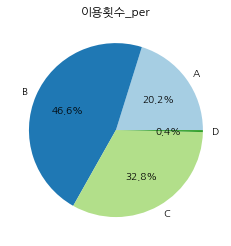

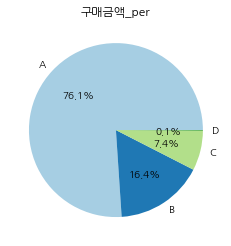

In [ ]:
df4_g1 = pd.DataFrame(df4.groupby('제휴사').agg({'고객번호':'count', '구매금액':'sum'}))
df4_g1.columns = ['이용횟수_count','구매금액_sum']
df4_g1['이용횟수_per'] = np.round((df4_g1['이용횟수_count']/df4_g1['이용횟수_count'].sum())*100,2)
df4_g1['구매금액_per'] = np.round((df4_g1['구매금액_sum']/df4_g1['구매금액_sum'].sum())*100,2)

ratio = df4_g1.이용횟수_per
labels = df4_g1.index

plt.subplots()
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('이용횟수_per')
ratio1 = df4_g1.구매금액_per
plt.subplots()
plt.pie(ratio1, labels=labels, autopct='%.1f%%')
plt.title('구매금액_per')
plt.show()

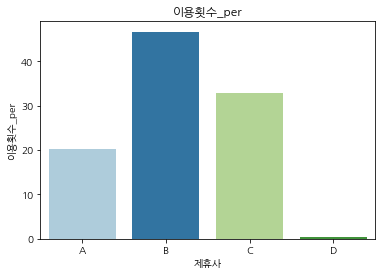

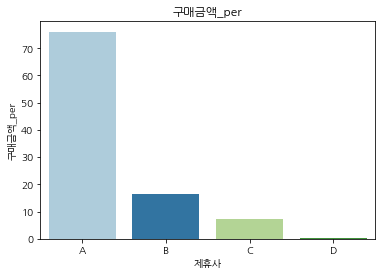

In [ ]:
x = df4_g1.index
y = df4_g1.이용횟수_per

plt.subplots()
sns.barplot(x,y)
plt.title('이용횟수_per')
y1 = df4_g1.구매금액_per
plt.subplots()
sns.barplot(x,y1)
plt.title('구매금액_per')
plt.show()

In [ ]:
# 건수별(1) 제휴사별 대분류 건수 순위
# 대분류 구매횟수(구매 count) 10순위
df4_g2 = df4.groupby(['제휴사','대분류코드'])[['고객번호']].count()
df4_g2.columns = ['count']

df4_g2_A = df4_g2.loc['A'].sort_values(by='count', ascending=False)
df4_g2_B = df4_g2.loc['B'].sort_values(by='count', ascending=False)
df4_g2_B = df4_g2_B[:10]
df4_g2_C = df4_g2.loc['C'].sort_values(by='count', ascending=False)
df4_g2_C = df4_g2_C[:10]
df4_g2_D = df4_g2.loc['D'].sort_values(by='count', ascending=False)
df4_g2_D = df4_g2_D[:10]

In [ ]:
def df_count_top10(df, df_g, i):
  df1 = df[df['제휴사']==i]
  df2 = df1[['제휴사', '대분류코드', '중분류명' ]]
  df2 = df2.drop_duplicates()
  df2_g = df2.groupby(['제휴사', '대분류코드']).sum()
  df_mer = pd.merge(df_g, df2_g, how='left', on='대분류코드')
  df_mer = df_mer.reset_index()
  df_mer['대분류코드'] = df_mer['대분류코드'].astype(str)
  return df_mer

def df_count_top10_show(df, df_g, i):
  df_mer = df_count_top10(df, df_g, i)
  sns.barplot(data = df_mer, x = '대분류코드',y = 'count')
  plt.title(f'{i}제휴사 구매count 10순위')
  plt.legend(df_mer['중분류명'].values, loc=(1,0))
  plt.show()

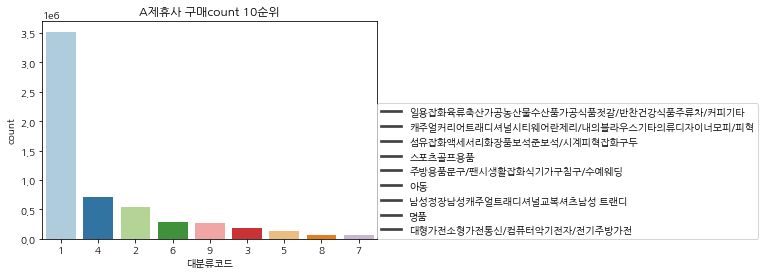

In [ ]:
# df4_g2_A, df4_g2_B, df4_g2_C, df4_g2_D
df_count_top10_show(df5, df4_g2_A, 'A')

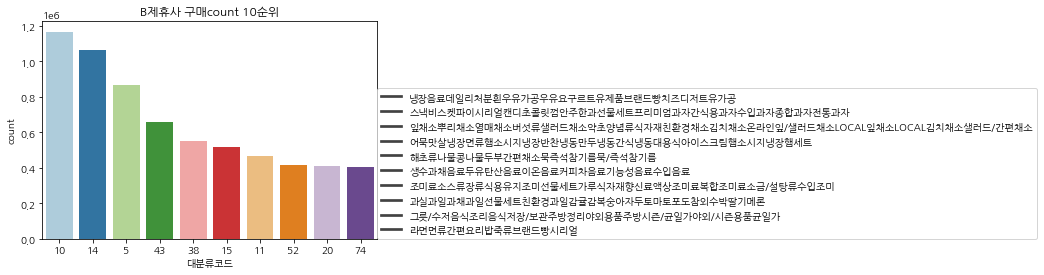

In [ ]:
df_count_top10_show(df5, df4_g2_B, 'B')

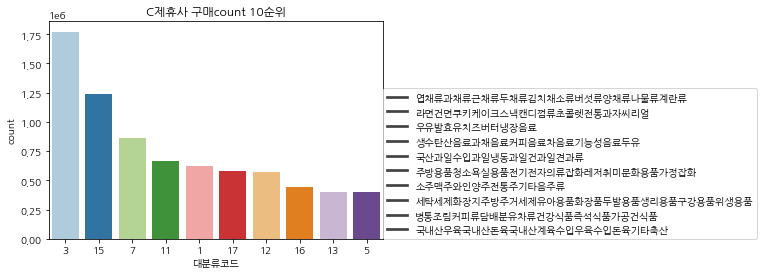

In [ ]:
df_count_top10_show(df5, df4_g2_C, 'C')

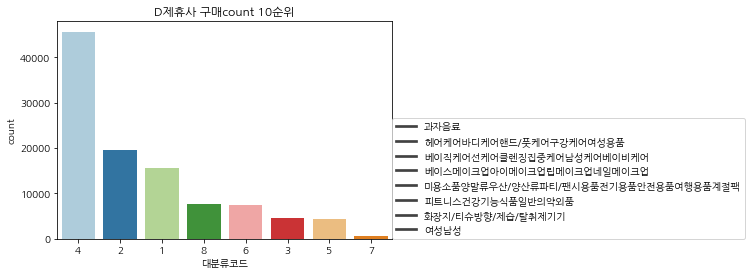

In [ ]:
df_count_top10_show(df5, df4_g2_D, 'D')

In [ ]:
# 상위  10순위의 중분류
# 중분류 구매횟수(구매 count) 10순위
df4_mid = df4.groupby(['제휴사','중분류코드'])[['고객번호']].count()
df4_mid.columns = ['count']

In [ ]:
def df4_mid_sum(df, i):
  df1 = df.loc[i].sort_values(by='count', ascending=False)
  sum_mid = df1['count'].sum()
  df1 = df1[:10]
  return sum_mid, df1

def df4_mid_count_top10(df, df4_m, df4_sum, i):
  df1 = df[df['제휴사']==i]
  df2 = df1[['제휴사', '중분류코드', '중분류명']]
  df2 = df2.drop_duplicates()
  df_mer1 = pd.merge(df4_m, df2, how='left', on='중분류코드')
  df_mer1['중분류코드'] = df_mer1['중분류코드'].astype(str)
  df_mer1['Acnt_per'] = (df_mer1['count']/df4_sum)*100
  return df_mer1

def df4_mid_show(df, df4_m, df4_sum, i):
  df_mer1 = df4_mid_count_top10(df, df4_m, df4_sum, i)
  sns.barplot(data = df_mer1, x = '중분류코드',y = 'count')
  plt.title(f'{i}제휴사 구매count 중분류 10순위')
  plt.legend(df_mer1['중분류명'].values)
  plt.show()

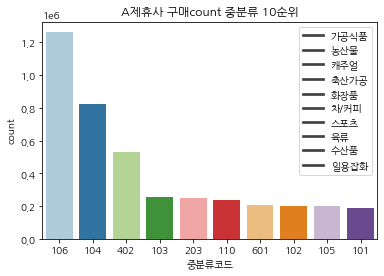

In [ ]:
sum_mid_A, df4_mid_A = df4_mid_sum(df4_mid, 'A')
sum_mid_B, df4_mid_B = df4_mid_sum(df4_mid, 'B')
sum_mid_C, df4_mid_C = df4_mid_sum(df4_mid, 'C')
sum_mid_D, df4_mid_D = df4_mid_sum(df4_mid, 'D')

df4_mid_show(df5, df4_mid_A, sum_mid_A, 'A')

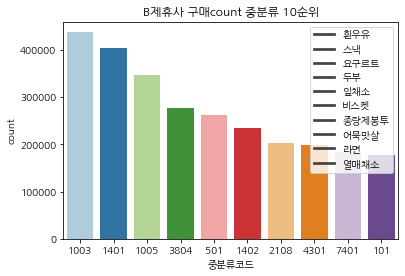

In [ ]:
df4_mid_show(df5, df4_mid_B, sum_mid_B, 'B')

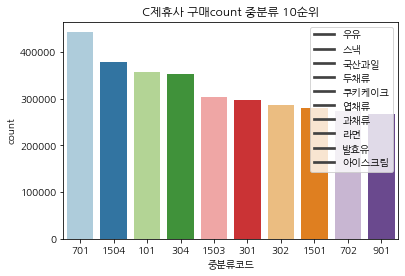

In [ ]:
df4_mid_show(df5, df4_mid_C, sum_mid_C, 'C')

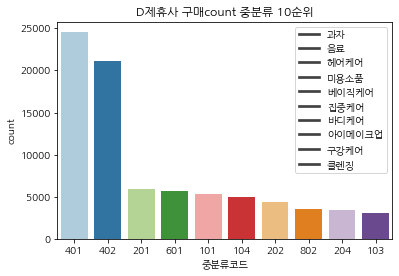

In [ ]:
df4_mid_show(df5, df4_mid_D, sum_mid_D, 'D')

In [ ]:
# 상위  10순위의 소분류 구매 횟수
df4_so = df4.groupby(['제휴사','소분류코드'])[['고객번호']].count()
df4_so.columns = ['count']

In [ ]:
def df_so_top10(df, i):
  df4_soso = df.loc[i]
  df4_soso = df4_soso.sort_values(by='count', ascending=False)
  cnt_sum = df4_soso['count'].sum()
  df4_soso = df4_soso[:10]
  return cnt_sum, df4_soso

def df_so_mer(df5, df, i):
  df_5 = df5[df5['제휴사'] == i]
  cnt_sum, df4_soso = df_so_top10(df, i)
  df_mer_so = pd.merge(df4_soso, df_5, on='소분류코드', how='inner')
  df_mer_so['중_소분류명'] = df_mer_so['중분류명'] + '_' + df_mer_so['소분류명']
  df_mer_so['Acnt_per'] = (df_mer_so['count']/cnt_sum)*100
  return df_mer_so

def df_so_top10_show(df5, df, i):
  df_mer_so = df_so_mer(df5, df, i)
  x = df_mer_so.index
  y = df_mer_so['count']
  plt.figure(figsize=(18,4))  
  sns.barplot(x,y)
  plt.xticks(x,df_mer_so['중_소분류명'].values)
  plt.show()

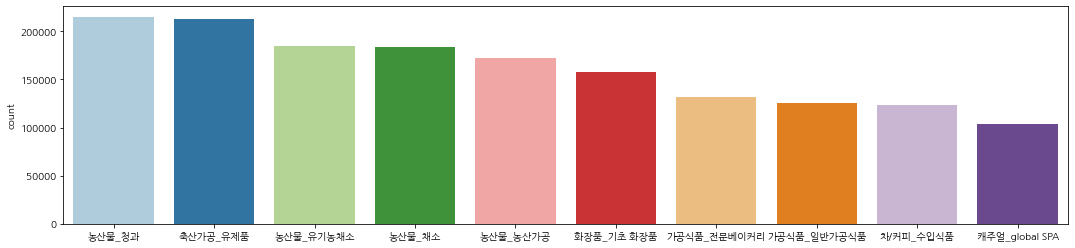

In [ ]:
df_so_top10_show(df5, df4_so, 'A')

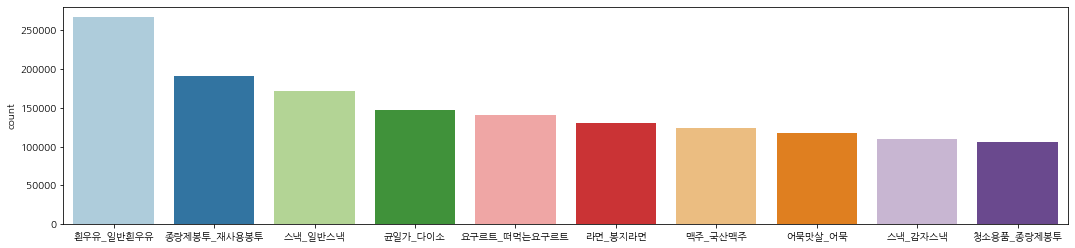

In [ ]:
df_so_top10_show(df5, df4_so, 'B')

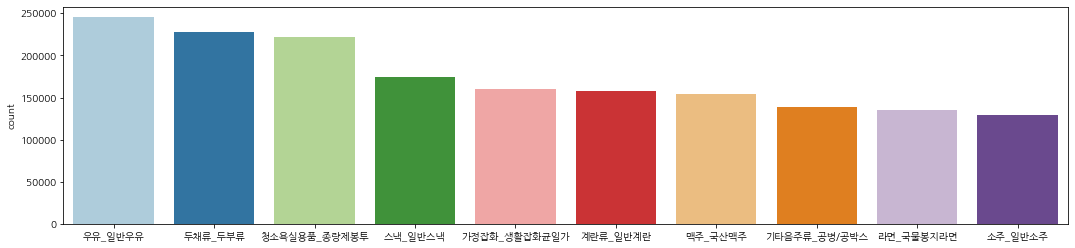

In [ ]:
df_so_top10_show(df5, df4_so, 'C')

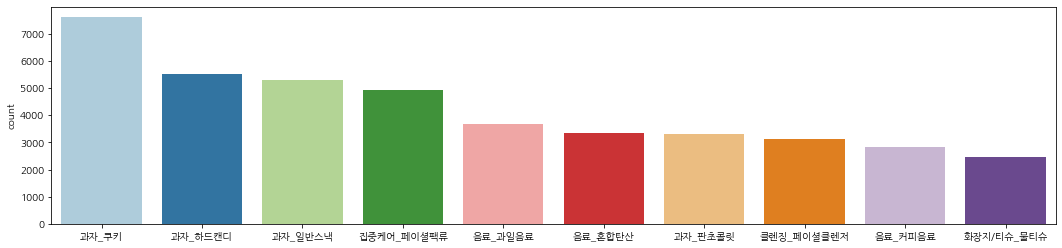

In [ ]:
df_so_top10_show(df5, df4_so, 'D')

In [ ]:
# 대분류 구매금액(구매금액 sum) 10순위
df4_sum1 = df4.groupby(['제휴사','대분류코드'])[['구매금액']].sum()
df4_sum1.columns = ['sum']

In [ ]:
def df_pur_m_sum(df, i):
  df_sum = df.loc[i].sort_values(by='sum', ascending=False)
  sum_values = df_sum['sum'].sum()
  df_sum = df_sum[:10]
  return sum_values, df_sum

def df5_div(i,  on = '중분류코드', item_name='중분류명'):
  df5_i = df5[df5['제휴사']== i]
  df5_i_1 = df5_i[['제휴사', on, item_name ]]
  df5_i_1 = df5_i_1.drop_duplicates()
  df5_i_g1 = df5_i_1.groupby(['제휴사', on]).sum()
  return df5_i_g1

def df_pur_m_mer(df5, df, i, on = '중분류코드'):
  df5_g = df5_div(i, on)
  sum_values, df_sum = df_pur_m_sum(df, i)
  df_mer_sum = pd.merge(df_sum, df5_g, how='left', on=on)
  df_mer_sum = df_mer_sum.reset_index()
  df_mer_sum[on] = df_mer_sum[on].astype(str)
  df_mer_sum['Asum_per'] = np.round((df_mer_sum['sum']/sum_values)*100,2)
  return df_mer_sum

def df_pur_m_show(df5, df, i, on = '중분류코드'):
  df_mer_sum = df_pur_m_mer(df5, df, i, on)
  sns.barplot(data = df_mer_sum, x = on ,y = 'sum')
  plt.title(f'{i}제휴사 구매금액 sum 10순위')
  plt.legend(df_mer_sum['중분류명'].values, loc=(1,0))
  plt.show()

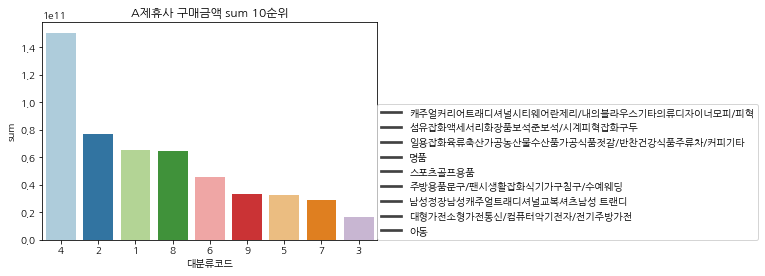

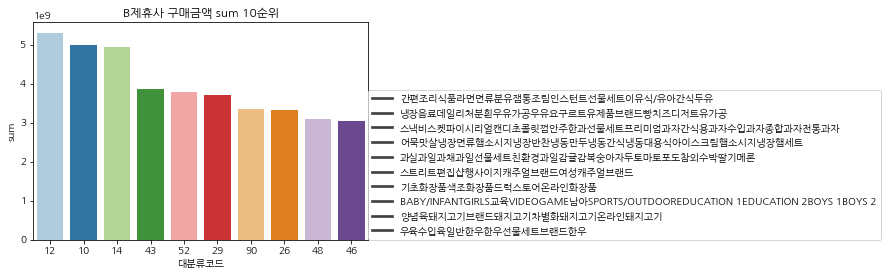

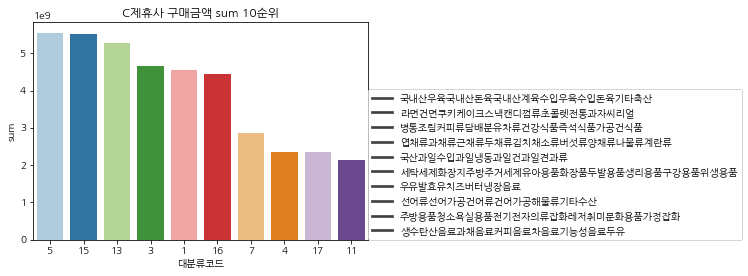

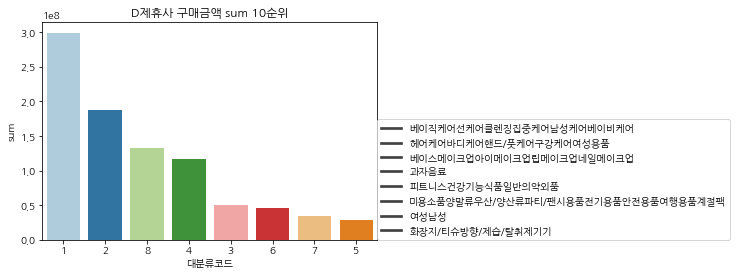

In [ ]:
df_pur_m_show(df5, df4_sum1, 'A', on = '대분류코드')
df_pur_m_show(df5, df4_sum1, 'B', on = '대분류코드')
df_pur_m_show(df5, df4_sum1, 'C', on = '대분류코드')
df_pur_m_show(df5, df4_sum1, 'D', on = '대분류코드')

In [ ]:
# 소분류 구매금액(sum) 10순위
df4_sum3 = df4.groupby(['제휴사','소분류코드'])[['구매금액']].sum()
df4_sum3.columns = ['sum']

In [ ]:
def df4_div(df, i):
  df_i = df.loc[i].sort_values(by='sum', ascending=False)
  sum_i = df_i['sum'].sum()
  df_i = df_i[:10]
  return sum_i, df_i

def df_mer(df, df2, sum, on = '소분류코드'):
  df_mer_sumi = pd.merge(df, df2, how='left', on=on)
  df_mer_sumi = df_mer_sumi.reset_index()
  df_mer_sumi[on] = df_mer_sumi[on].astype(str)
  df_mer_sumi['sum_per'] = np.round((df_mer_sumi['sum']/sum)*100,2)
  df_mer_sumi['소분류명_sum_per'] = df_mer_sumi['소분류명'] + ' ' + df_mer_sumi['sum_per'].astype(str) + ' %'
  return df_mer_sumi

def df_sum_show(df, i, on = '소분류코드',item_name='소분류명'):
  sum_i, df_i = df4_div(df, i)
  df5_g = df5_div(i,  on, item_name)
  df_mer_i = df_mer(df_i, df5_g, sum_i, on)
  sns.barplot(data = df_mer_i, x = on, y = 'sum')
  plt.title(f'{i}제휴사 구매금액 sum 10순위')
  plt.legend(df_mer_i['소분류명_sum_per'].values, loc=(1,0))
  plt.show()

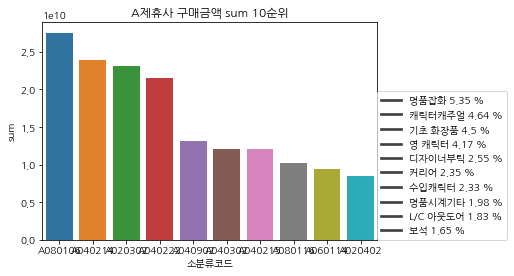

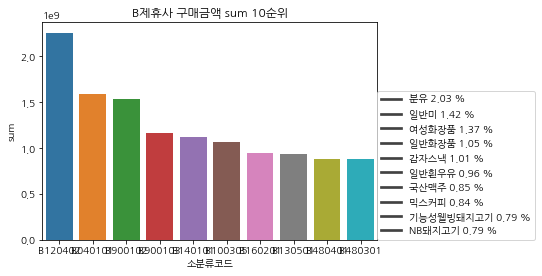

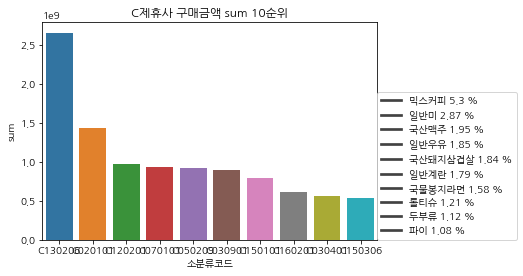

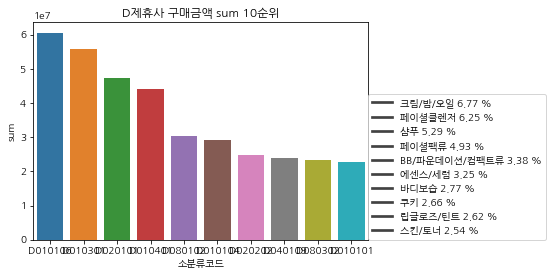

In [ ]:
df_sum_show(df4_sum3,'A')
df_sum_show(df4_sum3,'B')
df_sum_show(df4_sum3,'C')
df_sum_show(df4_sum3,'D')

In [ ]:
# 채널 이용 여부
df6['제휴사_']= df6['제휴사'].str.split('_').str.get(0)
df6['App/Online'] = df6['제휴사'].str.split('_').str.get(1)

In [ ]:
def mer(df, df2, how='left', on = '중분류코드'):
  df_mer = pd.merge(df, df2, how=how, on=on)
  return df_mer

df_mem = mer(df1, df6, on = '고객번호' )
df_mem = df_mem.fillna('No')

In [ ]:
cond = df_mem['제휴사'] == 'No'
df_mem[cond].shape

(12617, 8)

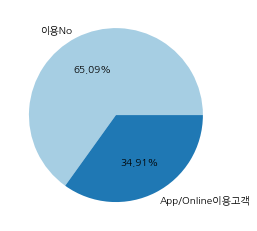

In [ ]:
cond = df_mem['제휴사'] == 'No'
No_cnt = df_mem[cond].shape[0]
ch = pd.DataFrame(data = [No_cnt, df1.shape[0]- No_cnt], index = ['이용No', 'App/Online이용고객'], columns = ['고객수'])
ch['per'] = np.round((ch['고객수']/ch['고객수'].sum())*100,2)
plt.pie(ch['per'], labels=ch.index, autopct='%.2f%%')
plt.show()

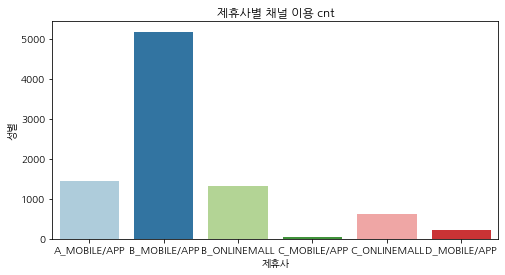

In [ ]:
ch_1 = pd.DataFrame(df_mem.groupby(['제휴사_','App/Online','제휴사'])['성별'].count())
ch_1 = ch_1.reset_index()
ch_1 = ch_1.drop(6)  # No 없애기
def ch_plt(df, x = '제휴사', y = '성별', title_i = '제휴사별 채널 이용 cnt'):
  plt.figure(figsize=(8,4))
  sns.barplot(data = df, x = x, y = y)
  plt.title(title_i)
  plt.show()

ch_plt(ch_1)

In [ ]:
# 멤버십 이용 여부
membership  = mer(df1, df3 ,how='left', on = '고객번호')
mem_g1 = membership.groupby(['고객번호','멤버십명'])['가입년월'].count()
mem_g1 = mem_g1.reset_index()

In [ ]:
mem_cnt = mem_g1.groupby(['고객번호'])[['가입년월']].count().shape[0]
mem = pd.DataFrame(data = [df1.shape[0]-mem_cnt,mem_cnt], index = ['이용No', '멤버쉽 이용고객'], columns = ['고객수'])
mem['per'] = np.round((mem['고객수']/mem['고객수'].sum())*100,2)

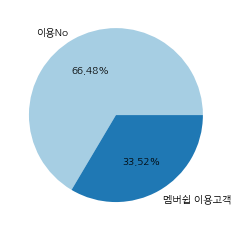

In [ ]:
plt.pie(mem['per'], labels=mem.index, autopct='%.2f%%')
plt.show()

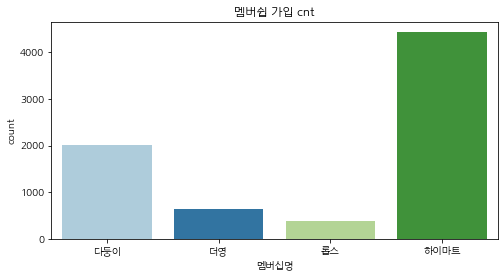

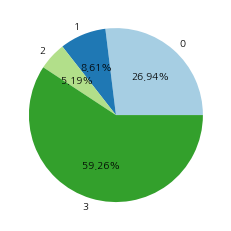

In [ ]:
mem_fm = pd.DataFrame(membership.groupby(['멤버십명'])['성별'].count())
mem_fm.columns = ['count']
mem_fm['per'] = np.round((mem_fm['count']/mem_fm['count'].sum())*100,2)
mem_fm = mem_fm.reset_index()
ch_plt(mem_fm, x = '멤버십명', y = 'count', title_i = '멤버쉽 가입 cnt')
plt.pie(mem_fm['per'], labels=mem_fm.index, autopct='%.2f%%')
plt.show()